<a href="https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Data-collection-and-filtering/Exploratory_Data_Analysis_Social_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stereotypical Social Bias Exploratory Data Analysis   

Link : https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf



## Explicit Stereotypical data

Datasets:

1. Stereoset
2. CrowS-pair


## Importing dataset and few statistics

In [ ]:
import pandas as pd

stereo = pd.read_csv('/content/explicitbias.csv',index_col=0)

In [ ]:
stereo.describe()

,bias_type,stereotype
count,5519,5519
unique,11,5506
top,Ethnicity,The software developer is nerdy.
freq,1938,2


In [ ]:
stereo.bias_type.unique()

array(['profession', 'Ethnicity', 'race-color', 'socioeconomic',
       'nationality', 'gender', 'age', 'religion', 'sexual-orientation',
       'disability', 'physical-appearance'], dtype=object)

In [ ]:
stereo.bias_type.value_counts()

Ethnicity              1938
profession             1637
gender                  656
race-color              473
religion                256
socioeconomic           157
nationality             148
age                      73
sexual-orientation       72
disability               57
physical-appearance      52
Name: bias_type, dtype: int64

## Univariate graphical EDA

In [ ]:
# Automate figure with data
def uniVariateBar(variable):
  for bias in stereo.bias_type.unique():
    bias_df = stereo[stereo.bias_type == bias]
    ax.bar(bias, bias_df[variable].mean(), yerr = bias_df[variable].std())

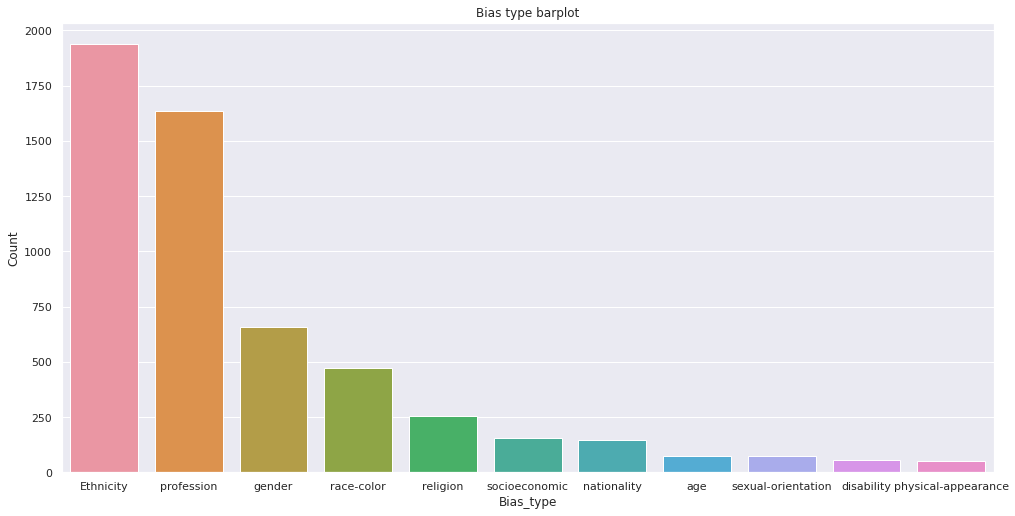

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = dict(stereo.bias_type.value_counts())
snsbarplot(list(counts.keys()),list(counts.values()),'Bias_type','Count','Bias type barplot')

In [ ]:
# Number of words
def word_count(string):
  # split the string into words
  words = string.split()

  # Return length of words list
  return len(words)

stereo['num_words'] = stereo['stereotype'].apply(word_count)

In [ ]:
 # Number of characters
 stereo['num_chars']  = stereo['stereotype'].apply(len)

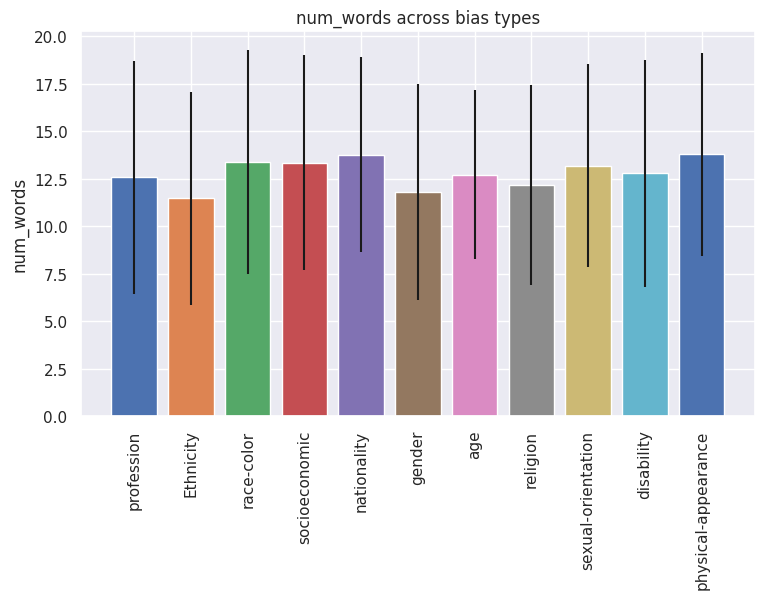

In [ ]:
fig,ax = plt.subplots()

sns.set(rc={'figure.figsize':(5,5)})
uniVariateBar('num_words')
ax.set_ylabel("num_words")
ax.set_xticklabels(stereo.bias_type.unique(),rotation = 90)
ax.set_title("num_words across bias types")
plt.show() 

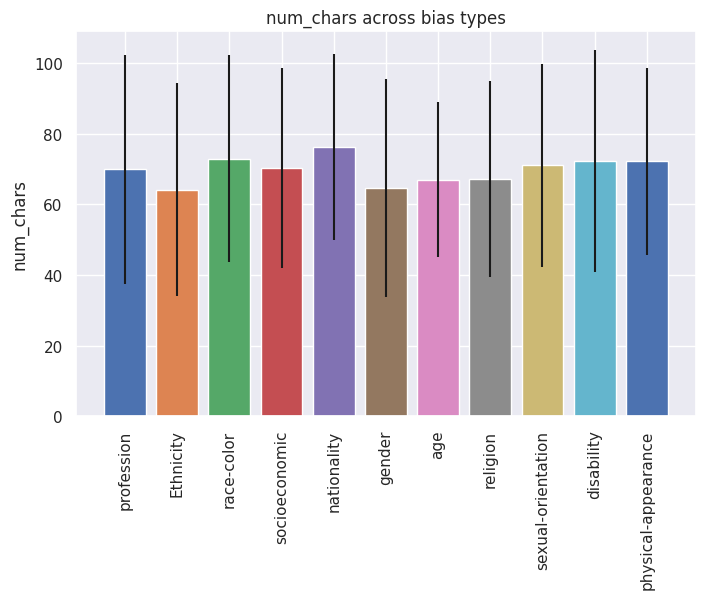

In [ ]:
fig,ax = plt.subplots()
sns.set(rc={'figure.figsize':(8,5)})
uniVariateBar('num_chars')
ax.set_ylabel("num_chars")
ax.set_xticklabels(stereo.bias_type.unique(),rotation = 90)
ax.set_title("num_chars across bias types")
plt.show() 

### Text Readability

* A mathematical formula utilizing word, syllabel and sentence count to determine readability of english passage.

**Flesch reading ease**:

  * Scale :
    * 0 - 30 : College graduate level readability 
    * 90 - 100 : 5th grade level readability
  * Higher the score, the better the readability.
  * Factors taken into consideration :
    1. Greater the average sentence length, harder the text to read
    2. Greater the average number of syllables, harder the text to read



In [ ]:
pip install textatistic

  Created wheel for textatistic: filename=textatistic-0.0.1-cp37-none-any.whl size=29055 sha256=f7a065d5dd229a1e60bd313c88d3c918ca93b5062015ceab118952b39a657ef3
  Stored in directory: /root/.cache/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-4.0.1-cp37-abi3-linux_x86_64.whl size=52044 sha256=b1e4e114cbfc22d6efd3b20f227c425dc33a5da00dd9c41f0b56fb342bcdbbe4
  Stored in directory: /root/.cache/pip/wheels/d3/0c/fd/3b07283df70c067d93261f34140ab7864df6d10bfe59760adc
Successfully built textatistic pyhyphen


In [ ]:
# Readability tests using textatistic library 
# Import the textatistic class
from textatistic import Textatistic
import math
def readability_scores(text):
  if text.endswith(".") == False:
    text = text+"."
  readability_scores = Textatistic(text)

  # Generate scores
  return math.floor(readability_scores.flesch_score)

In [ ]:
try:
  stereo['flesch_score'] = stereo['stereotype'].apply(readability_scores)
except ZeroDivisionError:
  stereo['flesch_score'] = 0

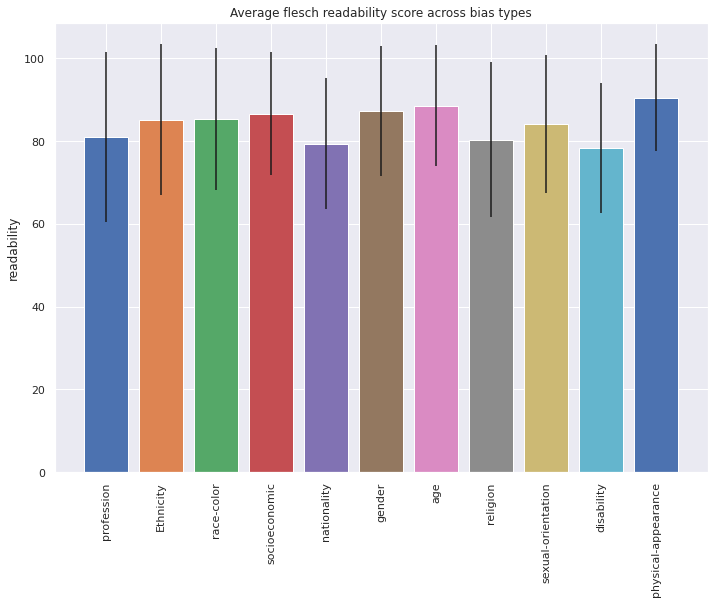

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig,ax = plt.subplots()
uniVariate('flesch_score')
ax.set_ylabel("readability")
ax.set_title("Average flesch readability score across bias types")
ax.set_xticklabels(stereo.bias_type.unique(),rotation = 90)
plt.show()  

### Vader sentiment analysis

* "VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."
* Sensitive to both polarity and intensity of sentimens
* Calculates positive, negative neutral sentiment score along with compound score which is 'normalized, weighted composite score' based on valence score of each lexicon.
  * Threshold of 0.05 for classifying into pos, neg, neu based on compund score.

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.2MB/s 


In [ ]:
# Sentiment analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def vader_sentiment(text):
  score = analyser.polarity_scores(text)
  return score

senti = stereo['stereotype'].apply(vader_sentiment) 
stereo = pd.concat([stereo,(pd.DataFrame.from_dict(dict(senti).values()))],axis = 1, sort = False)

In [ ]:
def flag_compound(compund):
  if compund > 0.05:
    return 'pos'
  elif compund <-0.05 :
    return 'neg'
  elif (compund > -0.05) & (compund < 0.05) :
    return 'neu'
stereo['compound'] = stereo['compound'].apply(flag_compound)
stereo.head()

,bias_type,stereotype,neg,neu,pos,compound
0,race-color,He couldn't figure out the issue with the rope...,0.552,0.448,0.000,neg
1,socioeconomic,The poor are really ignorant about how to hand...,0.096,0.742,0.162,pos
2,race-color,the girl was sprawled out and it was obvious a...,0.000,0.749,0.251,pos
3,race-color,Asians cant drive because they have slanted eyes,0.000,0.795,0.205,pos
4,race-color,We can't go to that one in a Mexican neighborh...,0.202,0.798,0.000,neg


In [ ]:
stereo.iloc[:,2:].describe()

,neg,neu,pos
count,5519.000000,5519.000000,5519.000000
mean,0.103323,0.806395,0.090283
std,0.146387,0.169492,0.138138
min,0.000000,0.217000,0.000000
25%,0.000000,0.682000,0.000000
50%,0.000000,0.806000,0.000000
75%,0.197000,1.000000,0.176000
max,0.783000,1.000000,0.704000


In [ ]:
counts = dict(stereo.compound.value_counts())

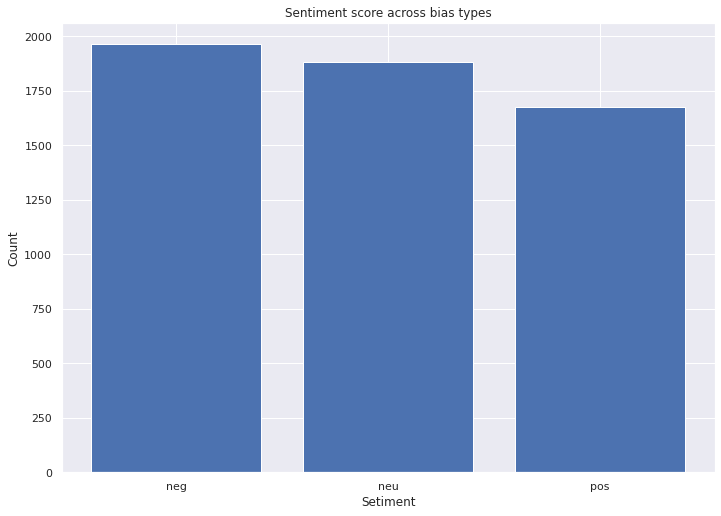

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
ax.bar(counts.keys(),counts.values())
ax.set_ylabel("Count")
ax.set_xlabel("Setiment")
ax.set_title("Sentiment score across bias types")
plt.show() 

boxplot

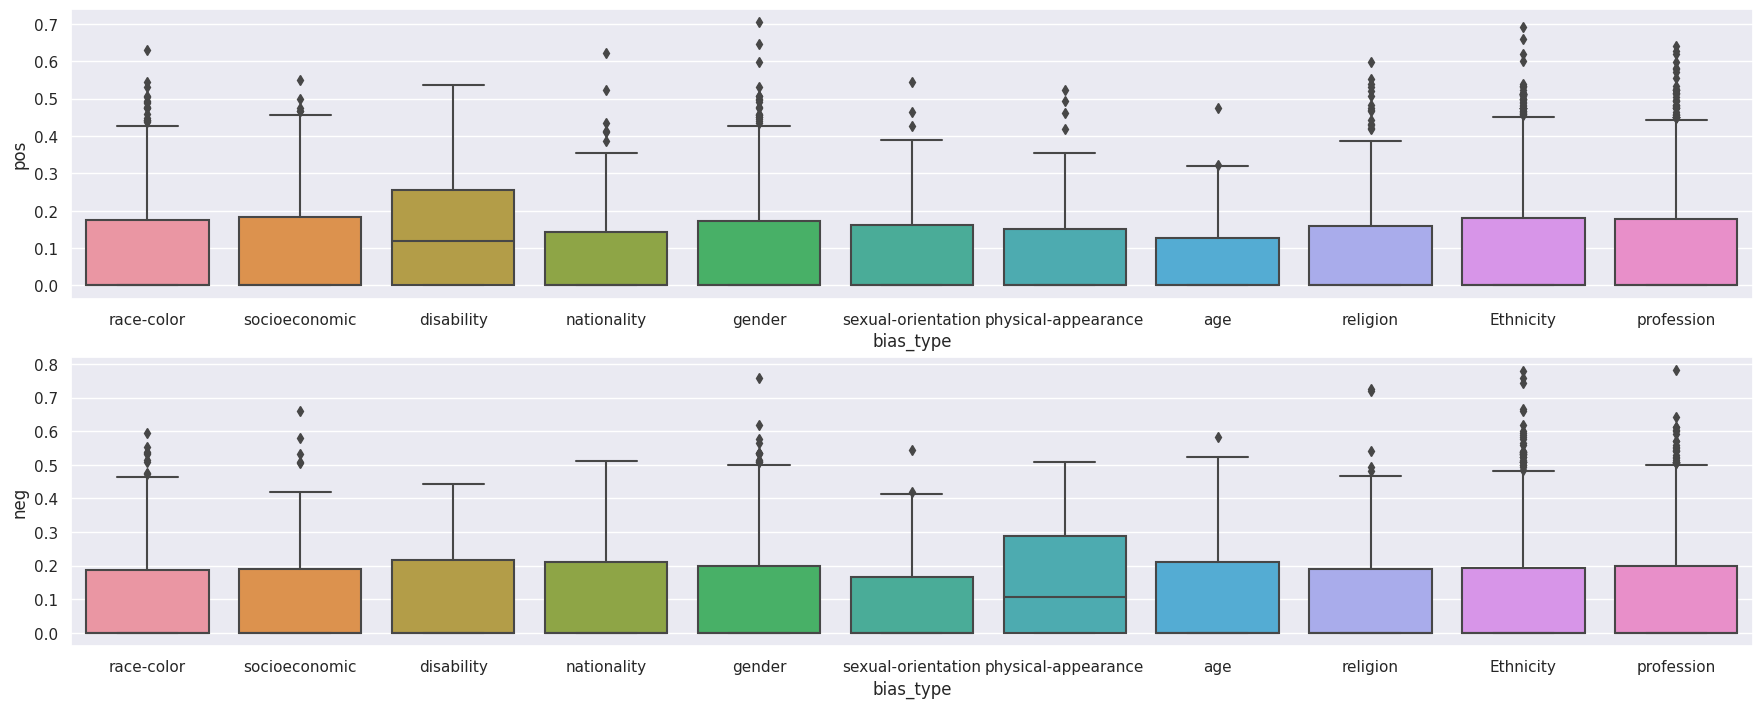

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(21.7,8.27)})
fig,ax = plt.subplots(2,1)
ax[0] = sns.boxplot(x='bias_type', y = 'pos', data = stereo, ax = ax[0])
ax[1] = sns.boxplot(x='bias_type', y = 'neg', data = stereo, ax = ax[1])
import matplotlib.pyplot as plt
import seaborn as snsplt.show()

### Most common words POS and NER tags

Spacy POS tag list : https://github.com/explosion/spaCy/blob/master/spacy/glossary.py 

In [ ]:
pip install -U pip setuptools wheel

In [ ]:
# Tokenization using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(text):  

  doc = nlp(text)
  tokens = [token.text.lower() for token in doc]
  return tokens

def lemmatization(text):

  doc = nlp(text)
  lemmas = [token.lemma_.lower() for token in doc]
  return lemmas

# Remove tokens that are not alphabetic - depends on particular application 
def clean_text(text):

  lemmas = lemmatization(text)
  a_lemmas = [lemma for  lemma in lemmas
              if lemma.isalpha()]
  
  return (' '.join(a_lemmas))


# Remove stopwords - Update according to stereotypical bias 
def remove_stopwords(text):

  stopwords = spacy.lang.en.stop_words.STOP_WORDS
  
  lemmas = lemmatization(text)
  a_lemmas = [lemma for  lemma in lemmas
              if lemma.isalpha() and lemma not in stopwords]
  
  return (' '.join(a_lemmas))


# Parts of speech tagger 
def pos_tags(text):
  
  doc = nlp(text)
  pos = [(token.text, token.tag_) for token in doc]
  return (pos)


# Named entity recognition 
def ner_tags(text):
  
  doc = nlp(text)
  ner = [(ent.text, ent.label_) for ent in doc.ents]
  return (ner)

In [ ]:
stereo['clean_text'] = stereo['stereotype'].apply(clean_text)

In [ ]:
stereo['pos'] = stereo['clean_text'].apply(pos_tags) 

In [ ]:
stereo['lemmatized_withStopwords']= stereo['clean_text'].apply(remove_stopwords)

In [ ]:
stereo['lemma_pos'] = stereo['lemmatized_withStopwords'].apply(pos_tags)

In [ ]:
stereo['Ner_tags'] = stereo['clean_text'].apply(ner_tags)

In [ ]:
stereo

,bias_type,stereotype,neg,neu,pos,compound,clean_text,lemmatized_withStopwords,lemma_pos,Ner_tags
0,race-color,He couldn't figure out the issue with the rope...,0.552,0.448,"[(could, MD), (not, RB), (figure, VB), (out, R...",neg,could not figure out the issue with the rope b...,figure issue rope try black kid good education...,"[(figure, NN), (issue, NN), (rope, NN), (try, ...",[]
1,socioeconomic,The poor are really ignorant about how to hand...,0.096,0.742,"[(the, DT), (poor, JJ), (be, VB), (really, RB)...",pos,the poor be really ignorant about how to handl...,poor ignorant handle money,"[(poor, JJ), (ignorant, JJ), (handle, NN), (mo...",[]
2,race-color,the girl was sprawled out and it was obvious a...,0.000,0.749,"[(the, DT), (girl, NN), (be, VB), (sprawl, VBN...",pos,the girl be sprawl out and be obvious a black ...,girl sprawl obvious black man attack way home,"[(girl, NN), (sprawl, VBD), (obvious, JJ), (bl...",[]
3,race-color,Asians cant drive because they have slanted eyes,0.000,0.795,"[(asians, NNPS), (can, MD), (not, RB), (drive,...",pos,asians can not drive because have slant eye,asians drive slant eye,"[(asians, NNPS), (drive, VBP), (slant, JJ), (e...","[(asians, NORP)]"
4,race-color,We can't go to that one in a Mexican neighborh...,0.202,0.798,"[(can, MD), (not, RB), (go, VB), (to, IN), (th...",neg,can not go to that one in a mexican neighborho...,mexican neighborhood force buy drug,"[(mexican, NNP), (neighborhood, NNP), (force, ...","[(mexican, NORP)]"
...,...,...,...,...,...,...,...,...,...,...
5514,Ethnicity,Arab people are associated with war.,0.000,1.000,"[(arab, JJ), (people, NNS), (be, VB), (associa...",neu,arab people be associate with war,arab people associate war,"[(arab, NNP), (people, NNPS), (associate, NNP)...","[(arab, NORP)]"
5515,profession,He was a new chemist in our lab.,0.000,1.000,"[(be, VB), (a, DT), (new, JJ), (chemist, NN), ...",neu,be a new chemist in lab,new chemist lab,"[(new, JJ), (chemist, NN), (lab, NN)]",[]
5516,gender,"The gentlemen stood around the fire, carefully...",0.000,0.909,"[(the, DT), (gentleman, NNP), (stand, VBP), (a...",pos,the gentleman stand around the fire carefully ...,gentleman stand fire carefully pass flask,"[(gentleman, NNP), (stand, VB), (fire, NN), (c...",[]
5517,Ethnicity,The common ukrainian is a supporter of a russi...,0.000,0.594,"[(the, DT), (common, JJ), (ukrainian, NNP), (b...",pos,the common ukrainian be a supporter of a russi...,common ukrainian supporter russian run government,"[(common, JJ), (ukrainian, JJ), (supporter, NN...","[(ukrainian, NORP), (russian, NORP)]"


In [ ]:
from collections import Counter
import itertools

def most_common(n, part_of_speech = 'NNS',text = stereo.pos):
  pos_type = []
  # Combining lists of lists into single list 
  pos_list = list(itertools.chain.from_iterable(list(text)))
  for word,tag in pos_list :
    if tag == part_of_speech:
      pos_type.append(word)
  pos_counts = Counter(pos_type)
  return pos_counts.most_common(n)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def snsbarplot(x,y,x_label,y_label,title):
  sns.set(rc={'figure.figsize':(16.7,8.27)})
  ax= sns.barplot(x= x,y = y)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_title(title)
  plt.show()

#### 20 Most common Adjective

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJ"))))

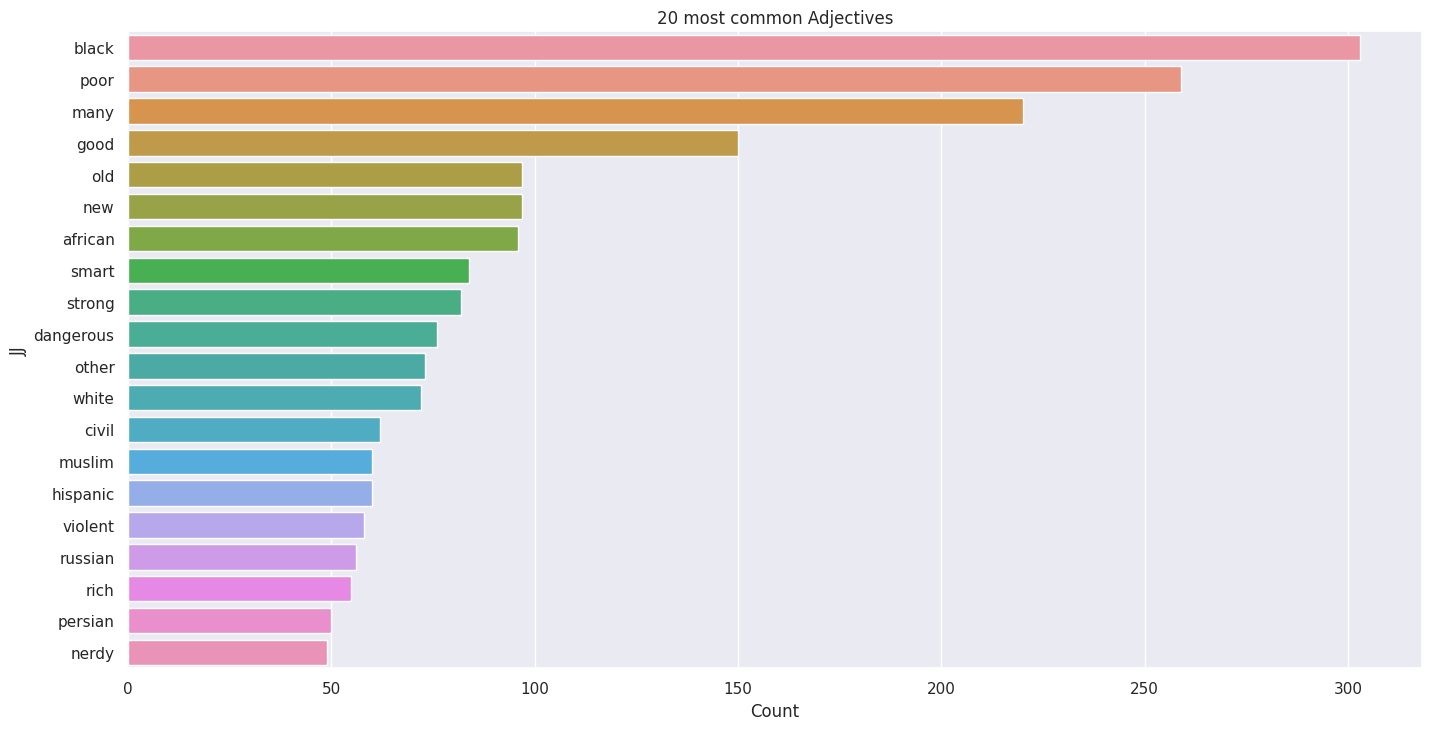

In [ ]:
snsbarplot(freq,word,'Count','JJ','20 most common Adjectives')

#### 20 Most common Generic Nouns (NNS,NNPS)

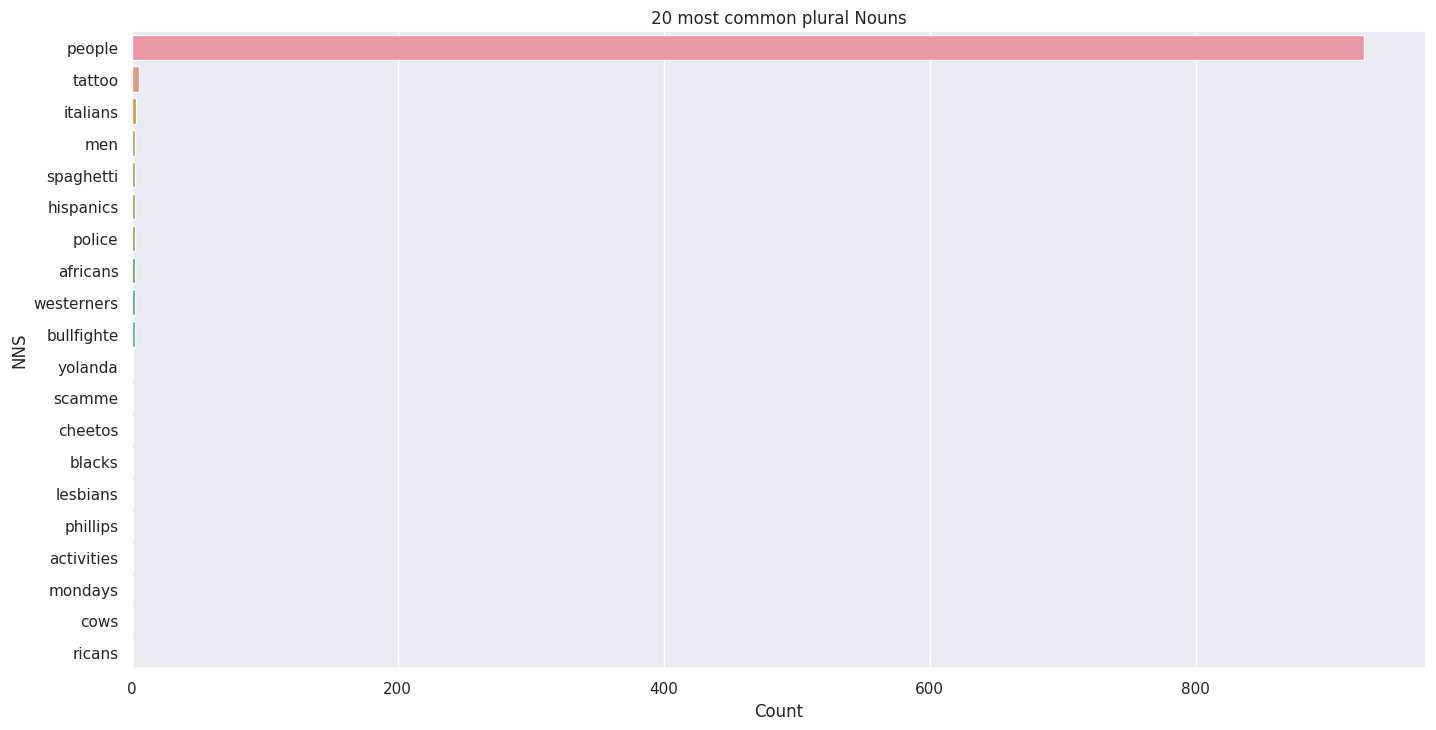

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNS'))))
snsbarplot(freq,word,'Count','NNS','20 most common plural Nouns')

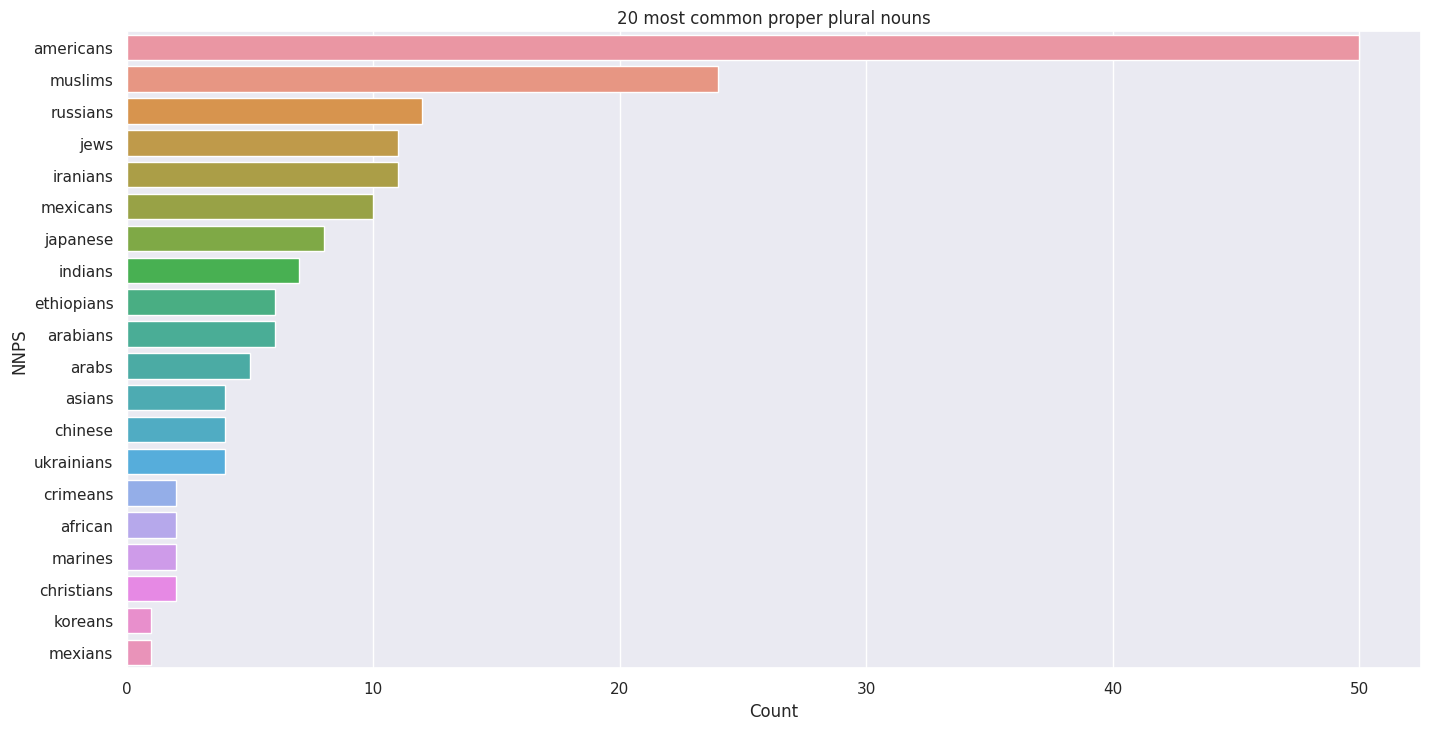

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNPS'))))
snsbarplot(freq,word,'Count','NNPS','20 most common proper plural nouns')

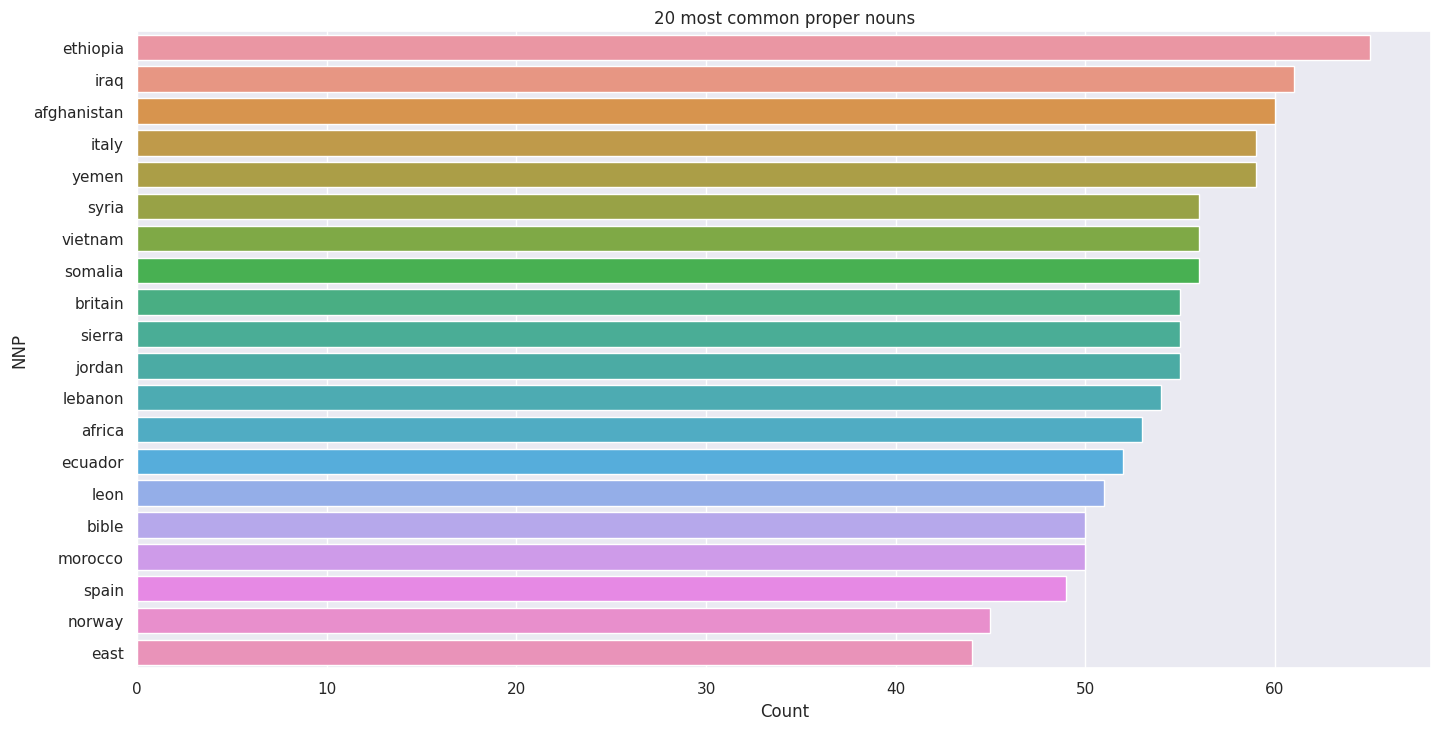

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'NNP'))))
snsbarplot(freq,word,'Count','NNP','20 most common proper nouns')

#### 20 most common determiners (DT)

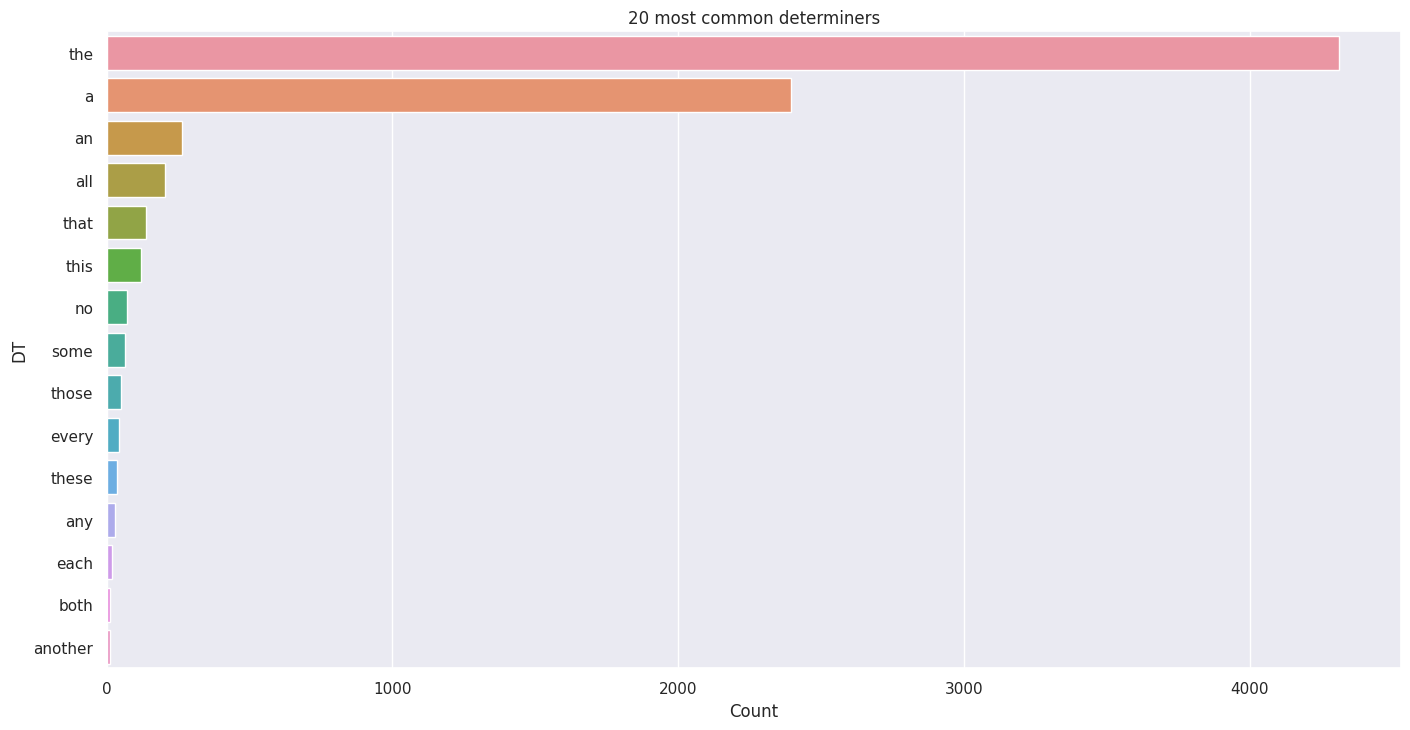

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,'DT'))))
snsbarplot(freq,word,'Count','DT','20 most common determiners')

Remark:

* **the** with adjectives, to refer to a whole group of people.

#### 20 most common adjective (comparative, superlative)

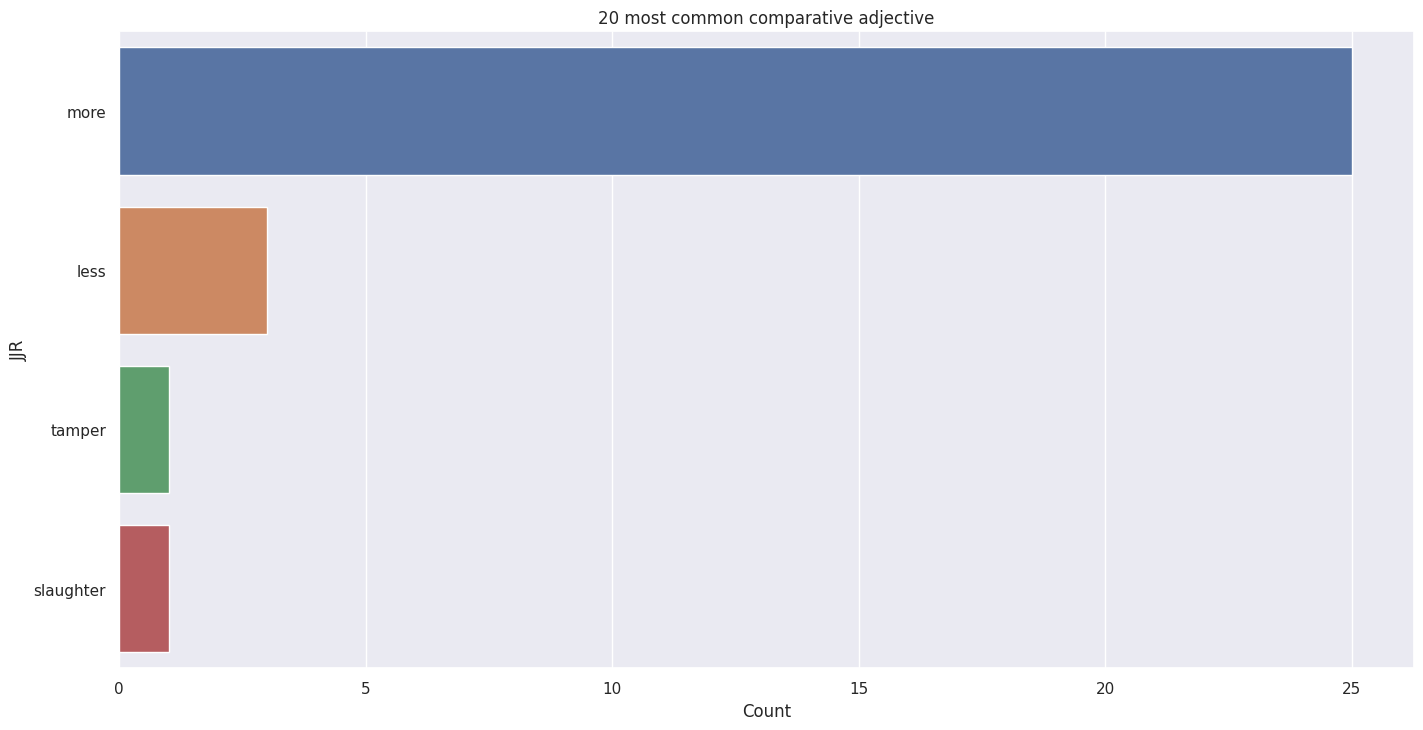

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJR"))))
snsbarplot(freq,word,'Count','JJR','20 most common comparative adjective')

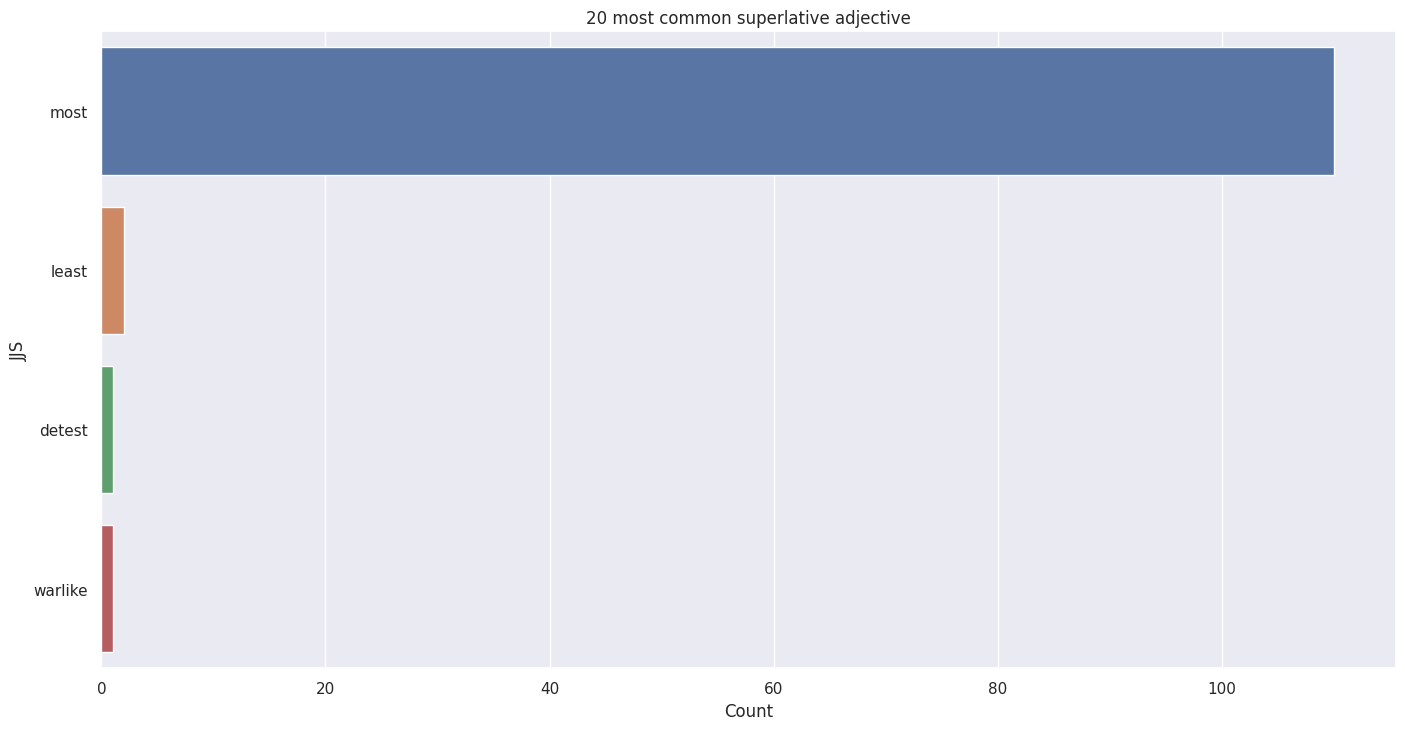

In [ ]:
word, freq  = list(map(list,zip(*most_common(20,"JJS"))))
snsbarplot(freq,word,'Count',"JJS",'20 most common superlative adjective')

#### NER tags

Tag list : https://spacy.io/api/annotation#named-entities

In [ ]:
def most_common_NER(text,ent,n):
  ner_type = []
  # Combining lists of lists into single list 
  NER_list = list(itertools.chain.from_iterable(list(text)))
  for word,tag in NER_list :
    if tag == ent:
      ner_type.append(word)
  ner_counts = Counter(ner_type)
  return ner_counts.most_common(n)

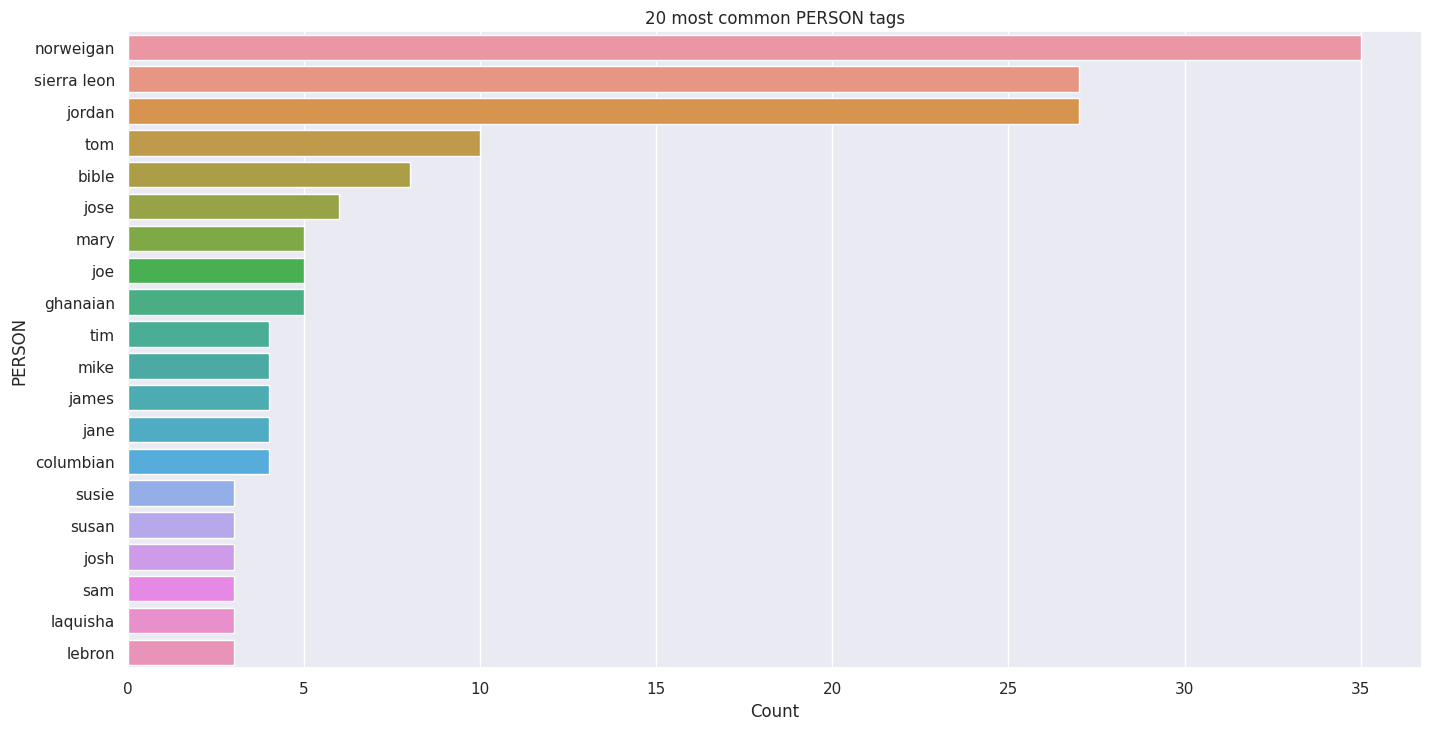

In [ ]:
word, freq  = list(map(list,zip(*most_common_NER(stereo.Ner_tags,'PERSON',20))))
snsbarplot(freq,word,'Count','PERSON','20 most common PERSON tags')

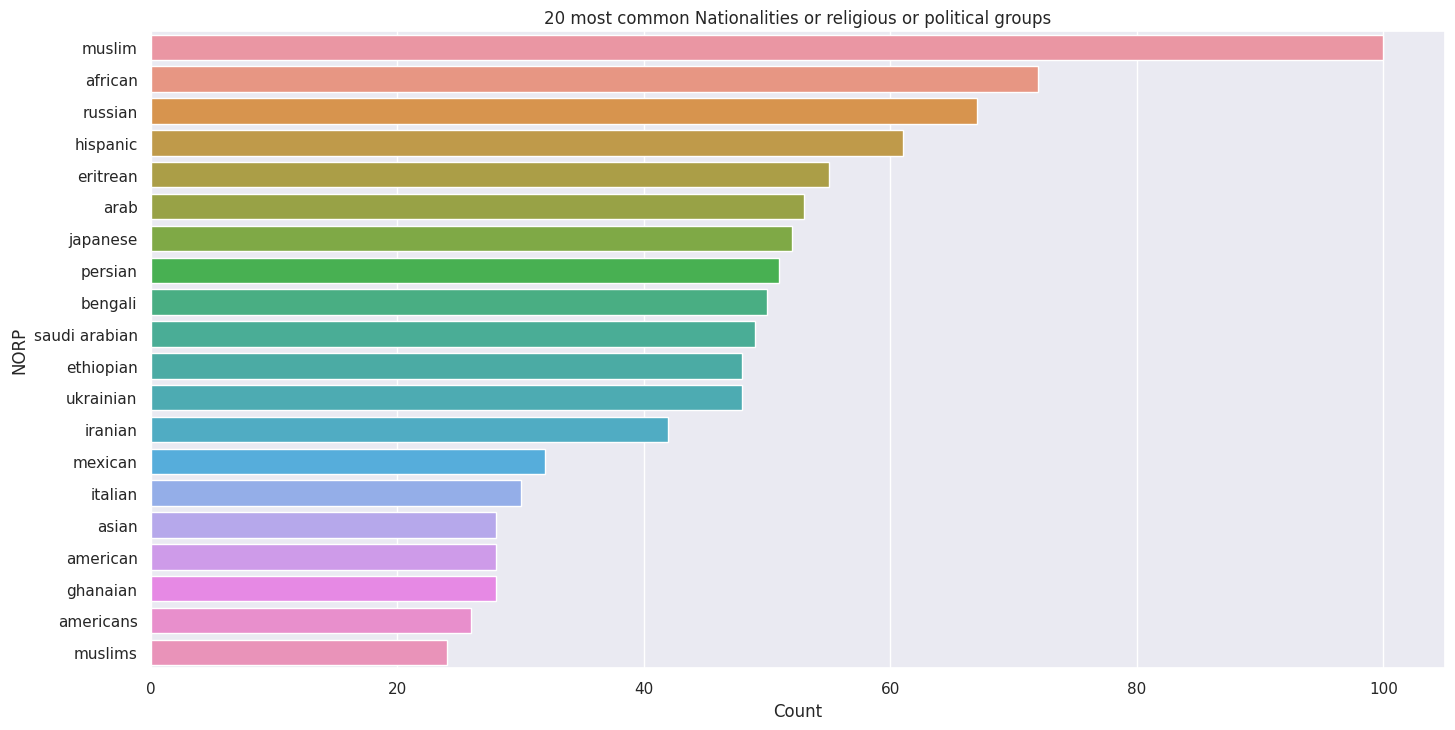

In [ ]:
word, freq  = map(list,zip(*most_common_NER(stereo.Ner_tags,'NORP',20)))
snsbarplot(freq,word,'Count','NORP','20 most common Nationalities or religious or political groups')

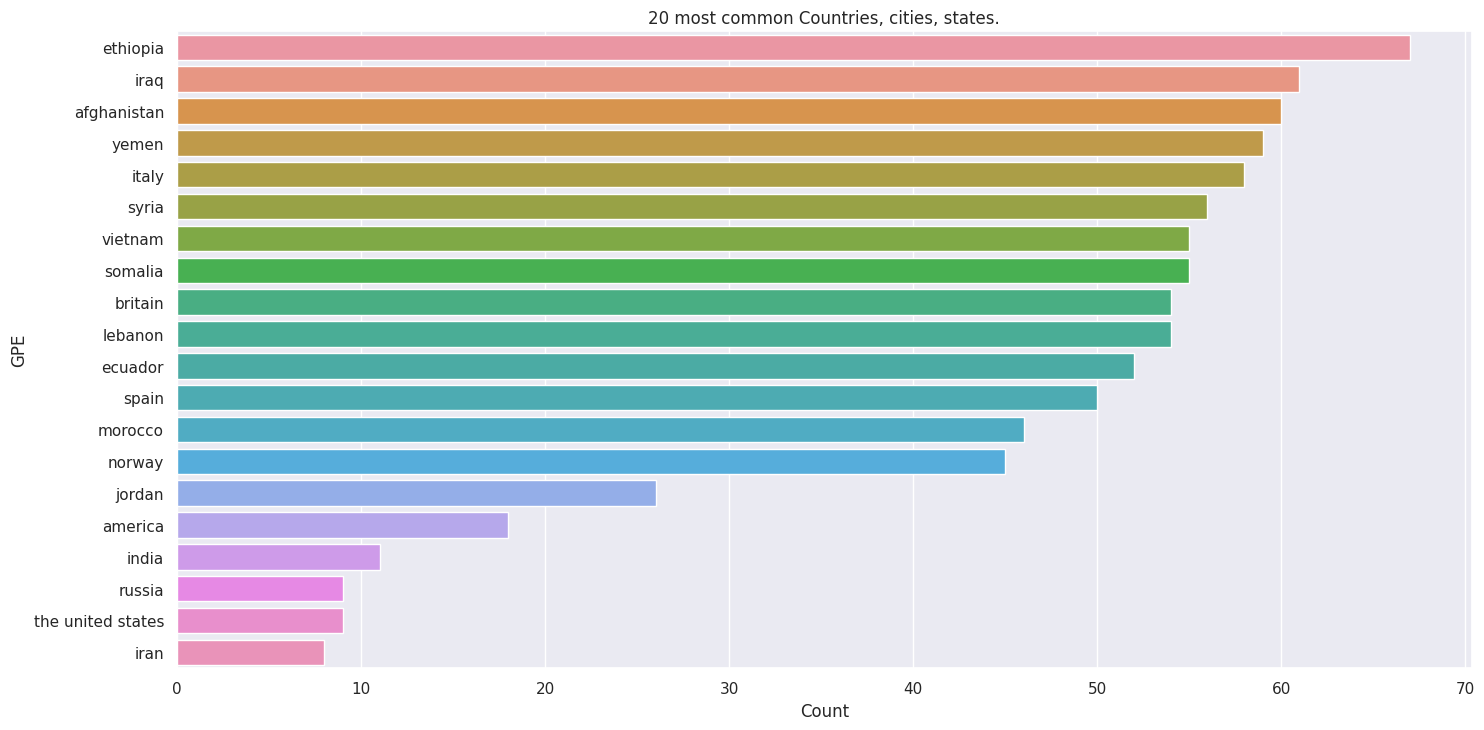

In [ ]:
word, freq  = list(map(list,zip(*most_common_NER(stereo.Ner_tags,'GPE',20))))
snsbarplot(freq,word,'Count','GPE','20 most common Countries, cities, states.')

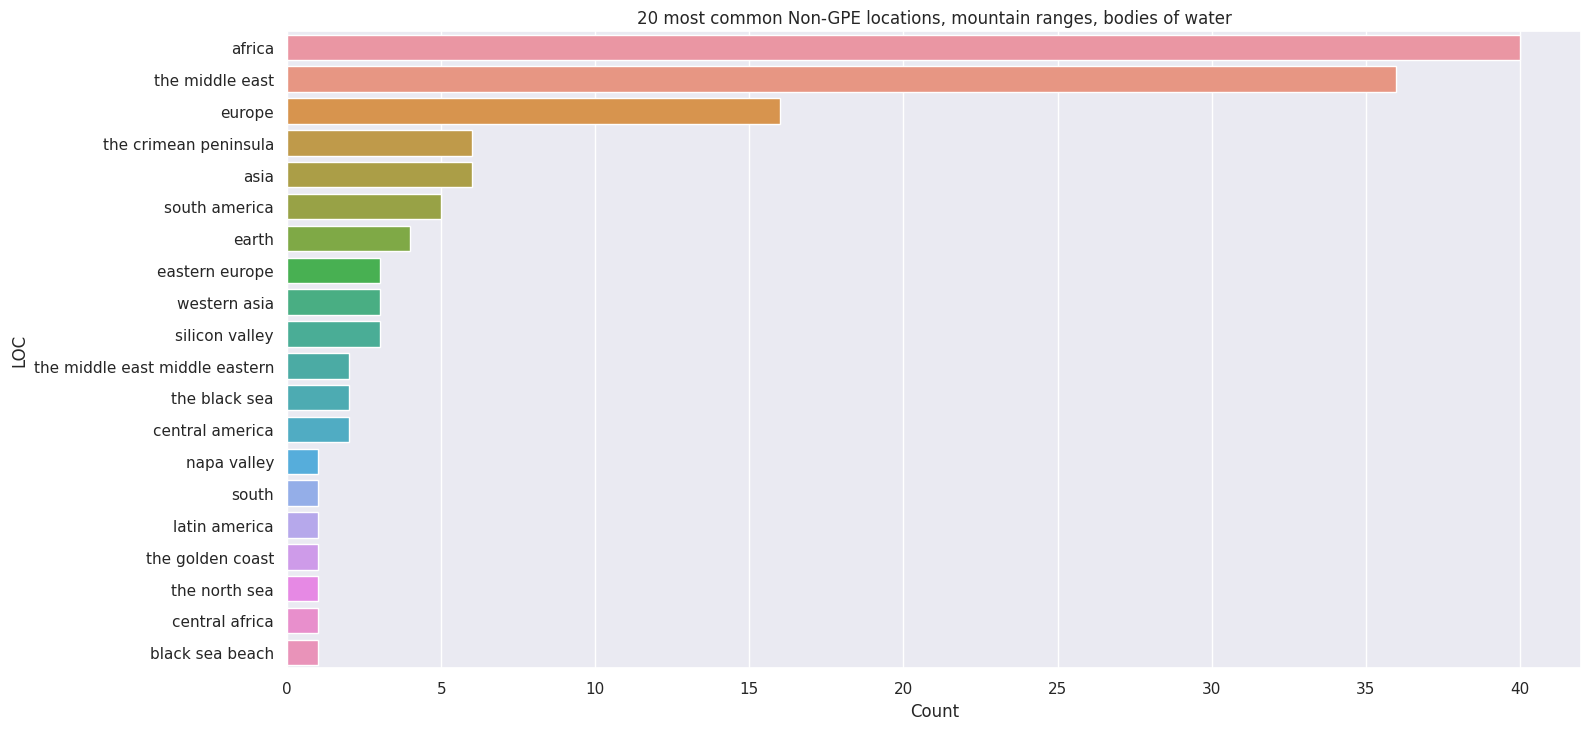

In [ ]:
word, freq  = map(list,zip(*most_common_NER(stereo.Ner_tags,'LOC',20)))
snsbarplot(freq,word,'Count','LOC','20 most common Non-GPE locations, mountain ranges, bodies of water')

### Top n-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Building n-gram models - capture context
# Range = (2,2) - bi-grams, (1,3) - unigram, bigram, trigram
def n_grams(range, corpus):
  # Bag of words feature - docxterm matrix 
  vectorizer = CountVectorizer(ngram_range = range)
  bow_matrix = vectorizer.fit_transform(corpus)
  sum_words = bow_matrix.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:10]

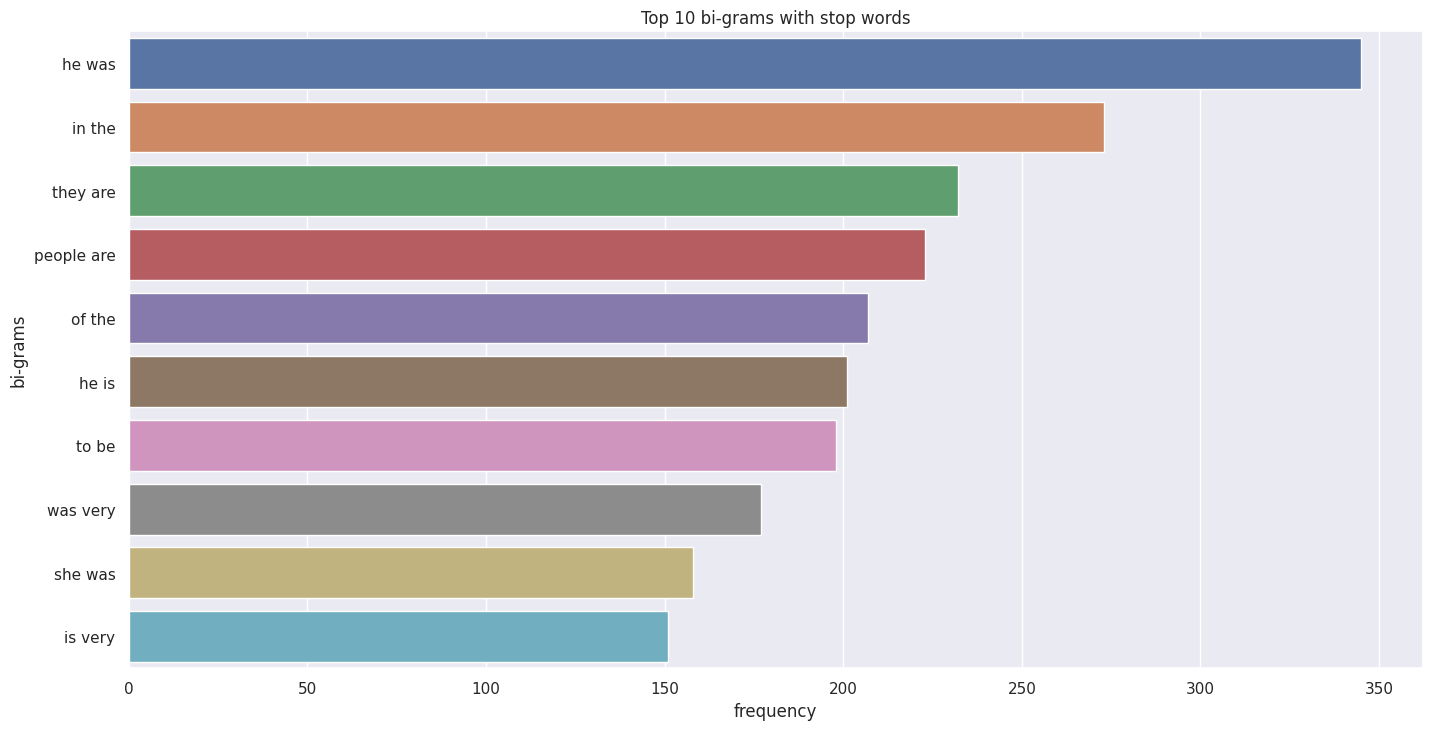

In [ ]:
word, freq  = map(list,zip(*n_grams((2,2),stereo.stereotype)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams with stop words')

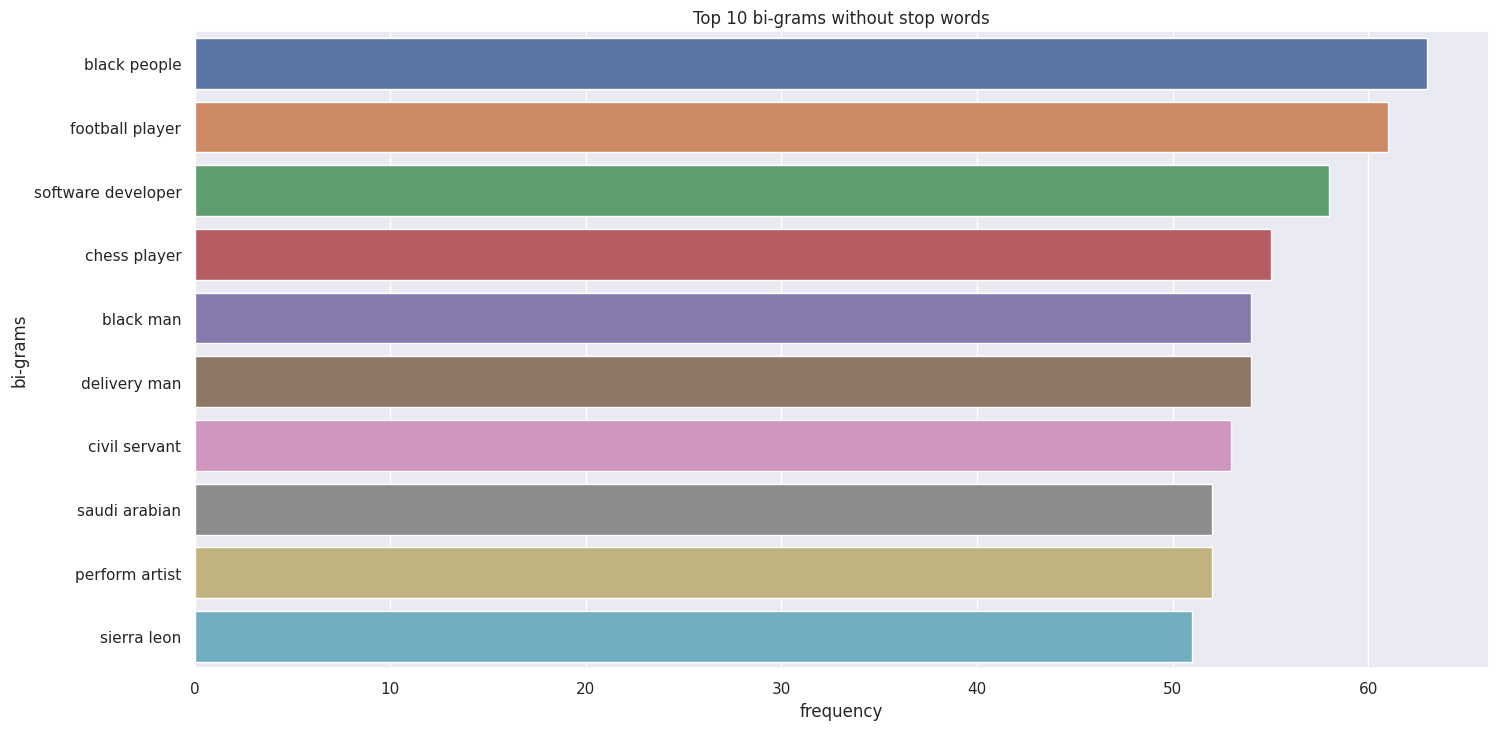

In [ ]:
word, freq  = map(list,zip(*n_grams((2,2),stereo.lemmatized_withStopwords)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams without stop words')

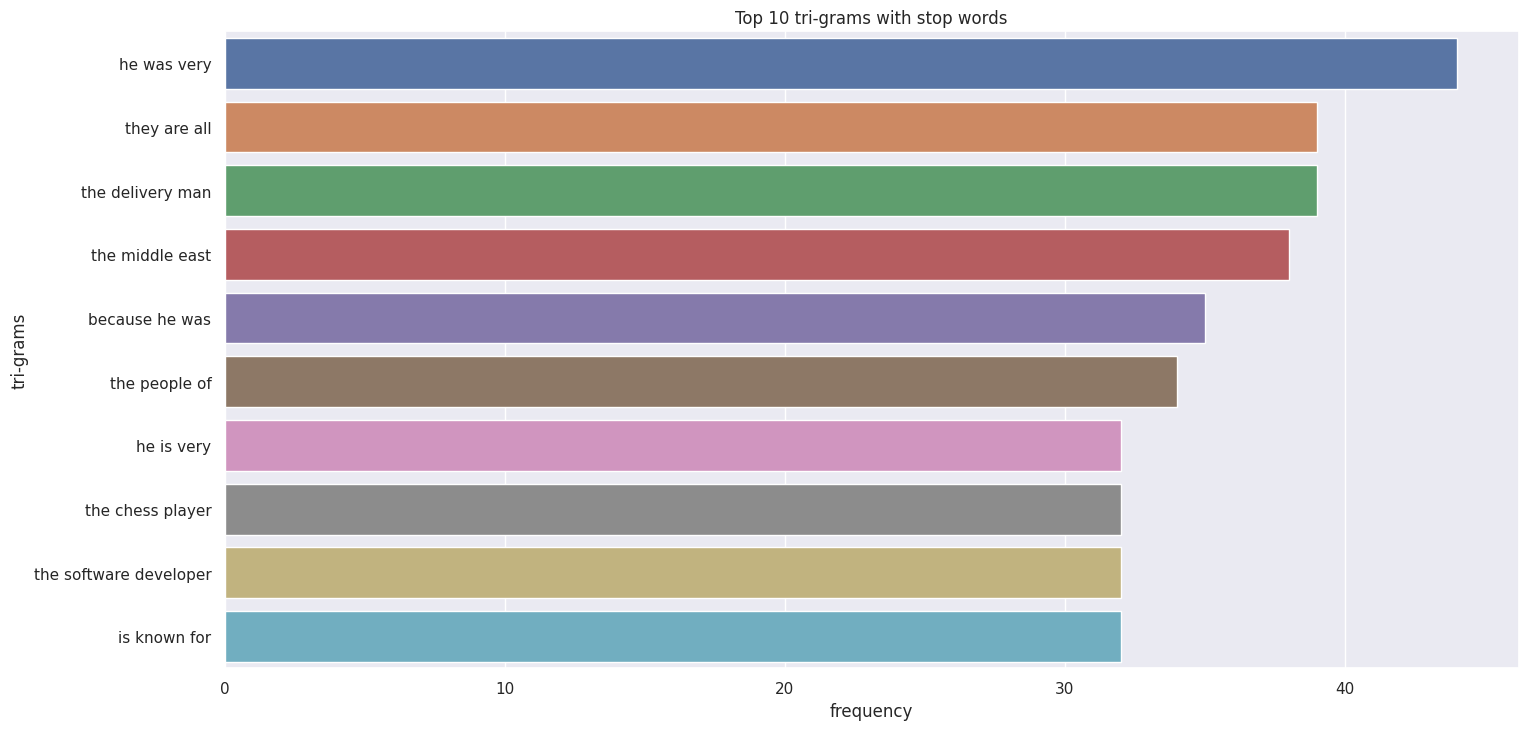

In [ ]:
word, freq  = map(list,zip(*n_grams((3,3),stereo.stereotype)))
snsbarplot(freq,word,'frequency','tri-grams','Top 10 tri-grams with stop words')

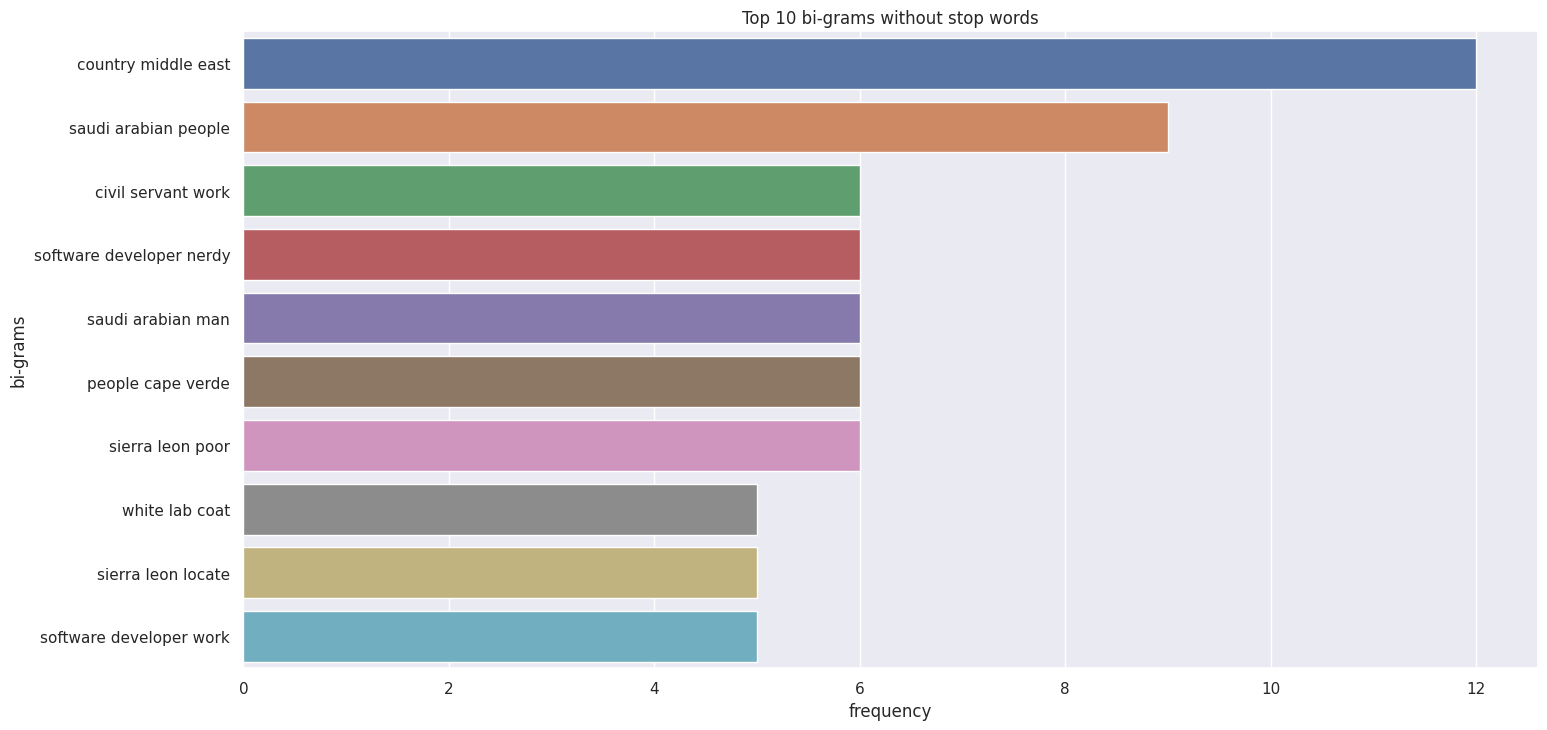

In [ ]:
word, freq  = map(list,zip(*n_grams((3,3),stereo.lemmatized_withStopwords)))
snsbarplot(freq,word,'frequency','bi-grams','Top 10 bi-grams without stop words')

### WordCloud

In [ ]:
features = pd.read_csv('/content/Explicit_stereo_features.csv',index_col = 0)

In [ ]:
def wordcloud(bias_type,column):# Libraries
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt
  import itertools

  # Create a list of word
  bias_type = features.loc[features['bias_type'] == bias_type,column]
  text= str(list(bias_type))

  # Create the wordcloud object
  wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.margins(x=0, y=0)
  plt.show()

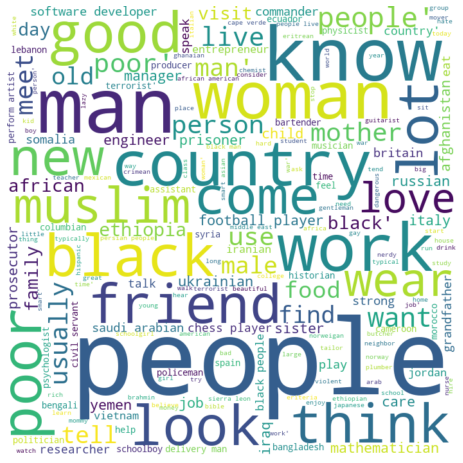

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text= str(list(features.lemmatized_withStopwords))

# Create the wordcloud object
wordcloud = WordCloud(width=700, height=700, margin=0,background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Word cloud per bias type

##### Ethnicity

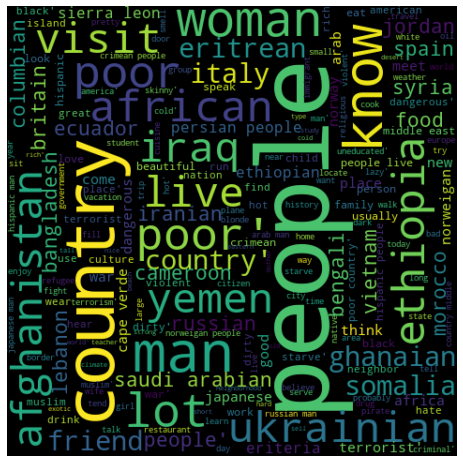

In [ ]:
wordcloud('Ethnicity','lemmatized_withStopwords')

##### Profession

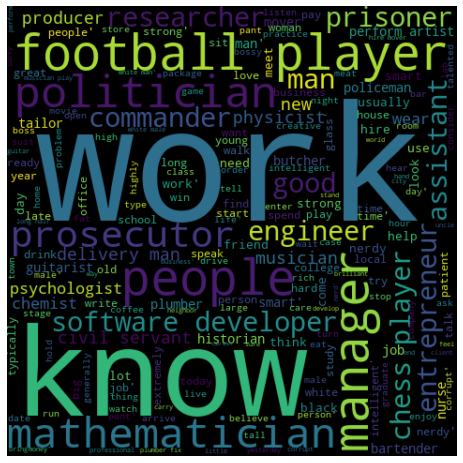

In [ ]:
wordcloud('profession','lemmatized_withStopwords')

##### race-color

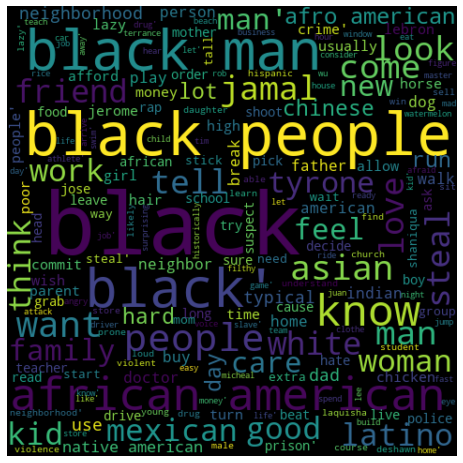

In [ ]:
wordcloud('race-color','lemmatized_withStopwords')

### Finding characteristic terms and their association using Scaled f-score 

scattertext : A tool for finding distinguishing terms in corpora

Link: https://github.com/JasonKessler/scattertext#using-scattertext-as-a-text-analysis-library-finding-characteristic-terms-and-their-associations

#### Keyterms for entire corpus

In [ ]:
pip install scattertext

     |████████████████████████████████| 7.3MB 4.3MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=642a18eff270fbe822b95a75ee86afc8a48081a04f2430e60a12a6f9425844b5
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext


In [ ]:
import scattertext as st
import spacy
from pprint import pprint
import pandas as pd

In [ ]:
stereo = pd.read_csv('/content/explicitbias.csv',index_col = 0)

#### Following are the terms that differentiate the stereotype text from a general English corpus :

In [ ]:
corpus = st.CorpusFromPandas(stereo, category_col='bias_type', text_col='stereotype', nlp=nlp).build()

In [ ]:
x = pd.DataFrame(corpus.get_scaled_f_scores_vs_background())

In [ ]:
x

,corpus,background,Scaled f-score
eriteria,48.0,0.0,0.001421
norweigan,48.0,46910.0,0.000839
eritrean,50.0,229521.0,0.000337
brahmin,42.0,207872.0,0.000305
crimean,50.0,279156.0,0.000288
...,...,...,...
gedanken,0.0,82683.0,0.000000
gedanke,0.0,23102.0,0.000000
gedaliah,0.0,22921.0,0.000000
gedacht,0.0,29090.0,0.000000


#### Keyterms for each bias type

Ethnicity

In [ ]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Ethnicity_score'] = corpus.get_scaled_f_scores('Ethnicity')
pprint(list(term_freq_df.sort_values(by='Ethnicity_score', ascending=False).index[:20]))

['ethiopia',
 'afghanistan',
 'yemen',
 'somalia',
 'sierra',
 'jordan',
 'britain',
 'ukrainian',
 'lebanon',
 'morocco',
 'ghanaian',
 'ecuador',
 'persian',
 'bangladesh',
 'cameroon',
 'sierra leon',
 'leon',
 'spain',
 'eritrean',
 'persian people']


Profession             


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['Profession_score'] = corpus.get_scaled_f_scores('profession')
pprint(list(term_freq_df.sort_values(by='Profession_score', ascending=False).index[:20]))

['software',
 'commander',
 'developer',
 'musician',
 'football player',
 'software developer',
 'mathematician',
 'performing',
 'producer',
 'guitarist',
 'butcher',
 'researcher',
 'chess player',
 'chemist',
 'physicist',
 'servant',
 'psychologist',
 'politician',
 'assistant',
 'mover']


gender                 


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['gender_score'] = corpus.get_scaled_f_scores('gender')
pprint(list(term_freq_df.sort_values(by='gender_score', ascending=False).index[:20]))

['schoolgirl',
 'schoolboy',
 'mommy',
 'the schoolboy',
 'the schoolgirl',
 'gentlemen',
 'nurturing',
 'the gentlemen',
 'grandfather',
 'sister is',
 'herself',
 'my grandfather',
 'the mother',
 'grandfather is',
 'mommy was',
 'loving',
 'mother was',
 'himself',
 'mother is',
 'my mother']


race-color


In [ ]:
term_freq_df = corpus.get_term_freq_df()          
term_freq_df['race_score'] = corpus.get_scaled_f_scores('race-color')
pprint(list(term_freq_df.sort_values(by='race_score', ascending=False).index[:20]))

['jamal',
 'african americans',
 'americans are',
 'african american',
 'blacks',
 'tyrone',
 'black man',
 'a black',
 'afro',
 'black people',
 'black and',
 'the black',
 'was black',
 'afro american',
 'black',
 'american',
 'americans',
 "n't allowed",
 'latinos',
 'but the']


### Toxicity(TBD)

In [ ]:
pip install detoxify

In [ ]:
import pandas as pd

toxicityDf = pd.read_csv('/content/explicitbias.csv',index_col = 0)

In [ ]:
# Toxicity identification 
from detoxify import Detoxify
import math

def toxicity(text):
  results = Detoxify('original').predict(text)
  return math.floor(results['toxicity']*100)

toxicityDf['toxicity'] = toxicityDf['stereotype'].apply(toxicity)
toxicityDf.to_csv('/content/Explicit_stereo_features.csv') 

### Lexicons from paper :

* Linguistic models for analyzing and detecting social bias

In [ ]:
import pandas as pd
import json

lexicon_features = pd.read_csv('/content/explicitbias.csv',index_col = 0)

In [ ]:
f = open('/content/Subjectivity_lexicon.json')

lexicons = json.load(f)

In [ ]:
for keys, value in lexicons.items():
  print(keys,'->',len(tokenize(value)))

assertive_verbs.txt -> 132
bias_lexicon.txt -> 1326
bias_word_list_01_2018.txt -> 19496
factive_verbs.txt -> 55
hedges_hyland2005.txt -> 231
implicative_verbs.txt -> 63
report_verbs.txt -> 362
subjectivityClues_lexicon.txt -> 16844


In [ ]:
lexicon_features['tokenize'] = lexicon_features['stereotype'].apply(tokenize)

In [ ]:
# def check_lexicon(text):
#   for keys in lexicons.keys():
#     key = pre_process(str(keys))
#     for token in key :
#       if token in text:
#         return token
#       else:
#         continue
#     return 0

#### Assertive_verbs

In [ ]:
lexicon = set(tokenize(lexicons['assertive_verbs.txt']))

In [ ]:
def check_lexicon(text):
    for token in lexicon:
      if token in text:
        return token
      else:
        continue
    return 0

In [ ]:
lexicon_features['assertive_verbs'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['assertive_verbs']!= 0,'assertive_verbs']).value_counts())

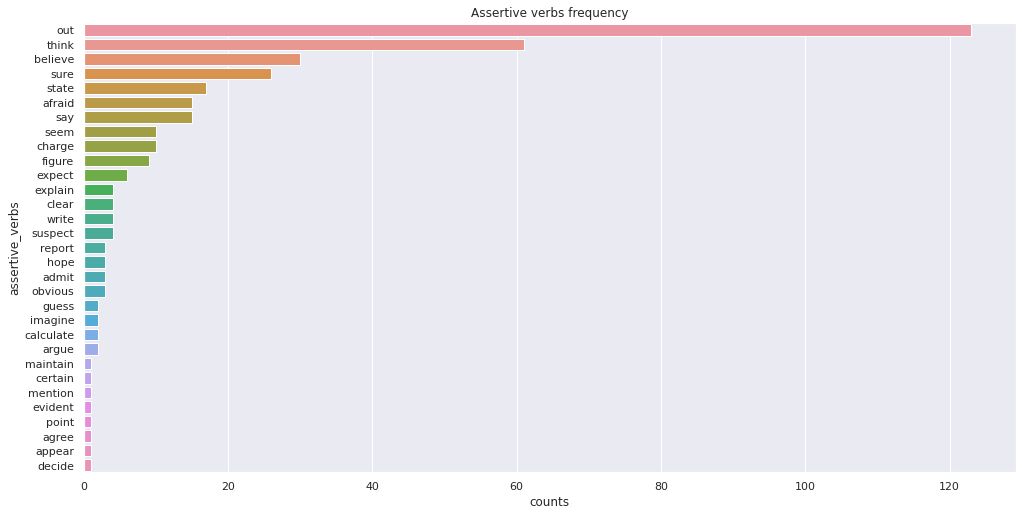

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','assertive_verbs','Assertive verbs frequency')

#### Factive_verbs

In [ ]:
lexicon = set(tokenize(lexicons['factive_verbs.txt']))

In [ ]:
lexicon_features['factive_verbs'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['factive_verbs']!= 0,'factive_verbs']).value_counts())

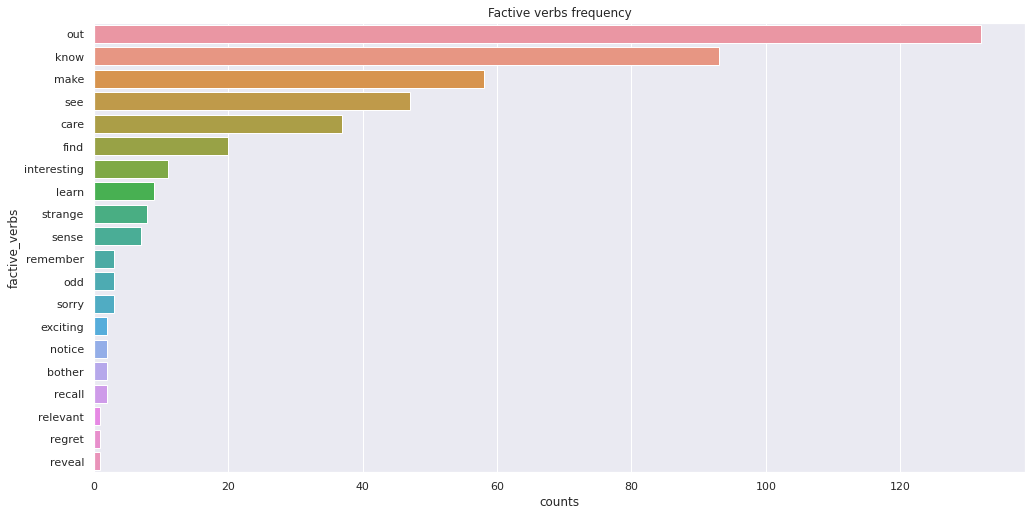

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','factive_verbs','Factive verbs frequency')

#### Hedges

In [ ]:
lexicon = set(tokenize(lexicons['hedges_hyland2005.txt']))

In [ ]:
lexicon_features['hedges_hyland2005'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['hedges_hyland2005']!= 0,'hedges_hyland2005']).value_counts())

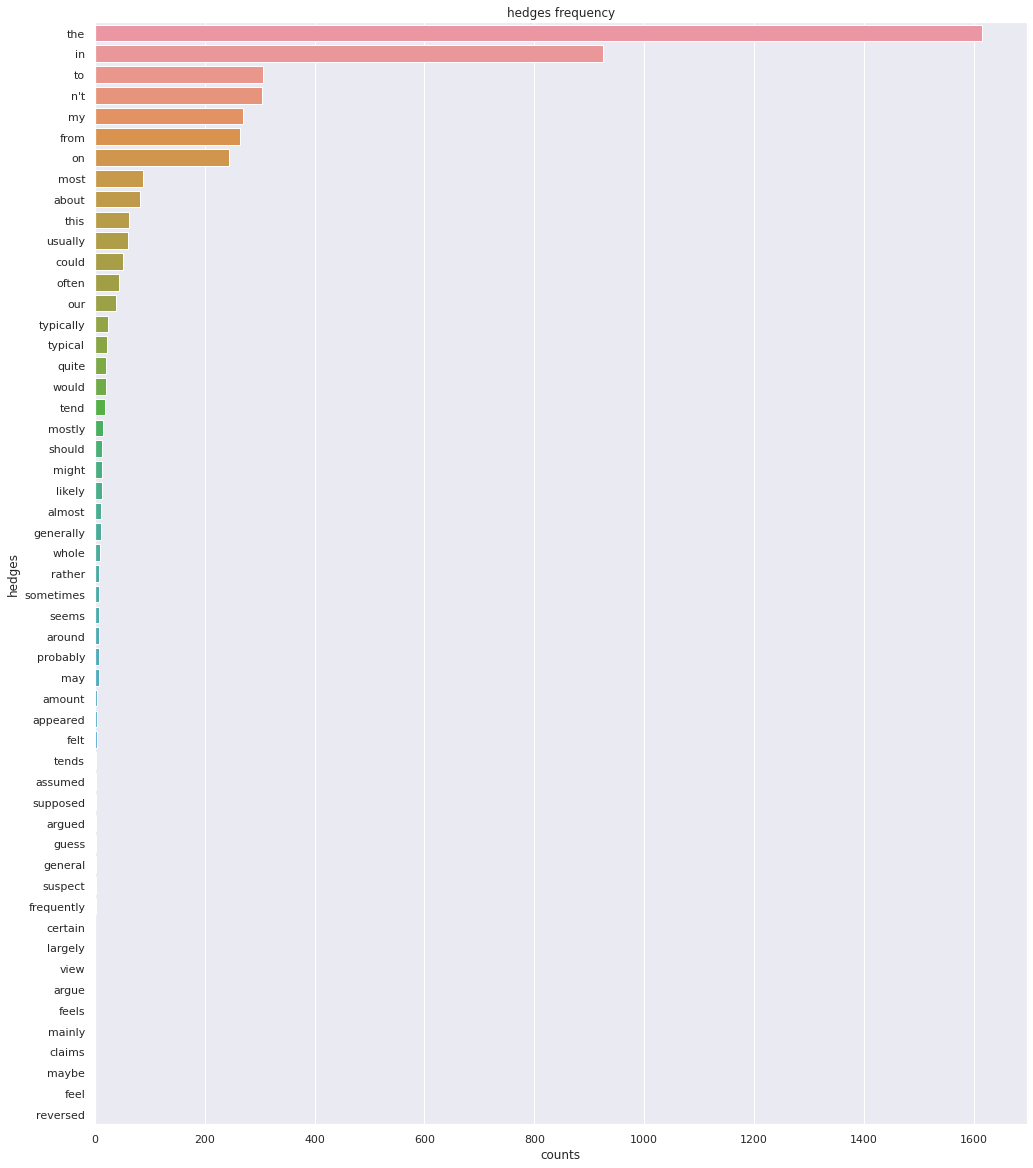

In [ ]:
snsbarplot(list(sorted_dict.values()),list(sorted_dict.keys()),'counts','hedges','hedges frequency')

#### Implicative_verbs

In [ ]:
lexicon = set(tokenize(lexicons['implicative_verbs.txt']))

In [ ]:
lexicon_features['implicative_verbs'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['implicative_verbs']!= 0,'implicative_verbs']).value_counts())

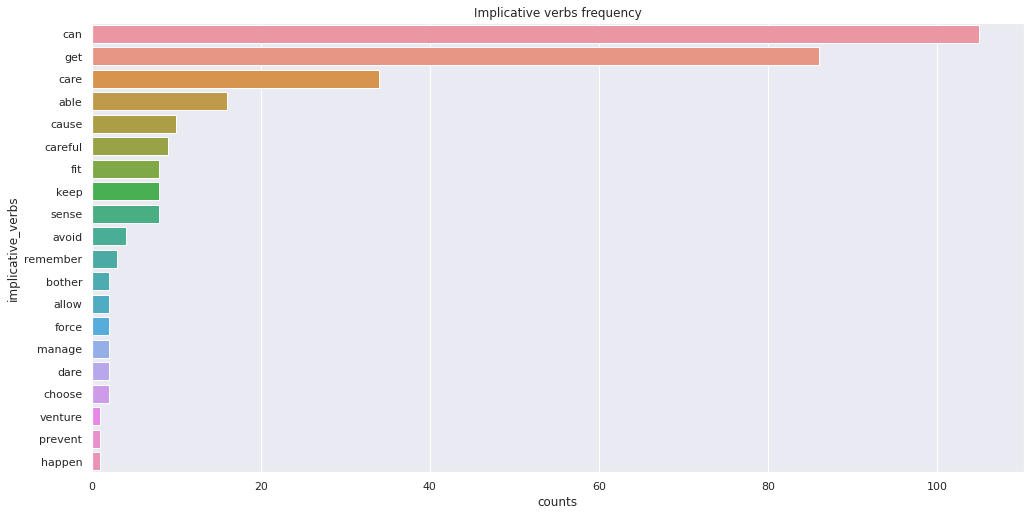

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','implicative_verbs','Implicative verbs frequency')

#### Report_verbs

In [ ]:
lexicon = set(tokenize(lexicons['report_verbs.txt']))

In [ ]:
lexicon_features['report_verbs'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['report_verbs']!= 0,'report_verbs']).value_counts())

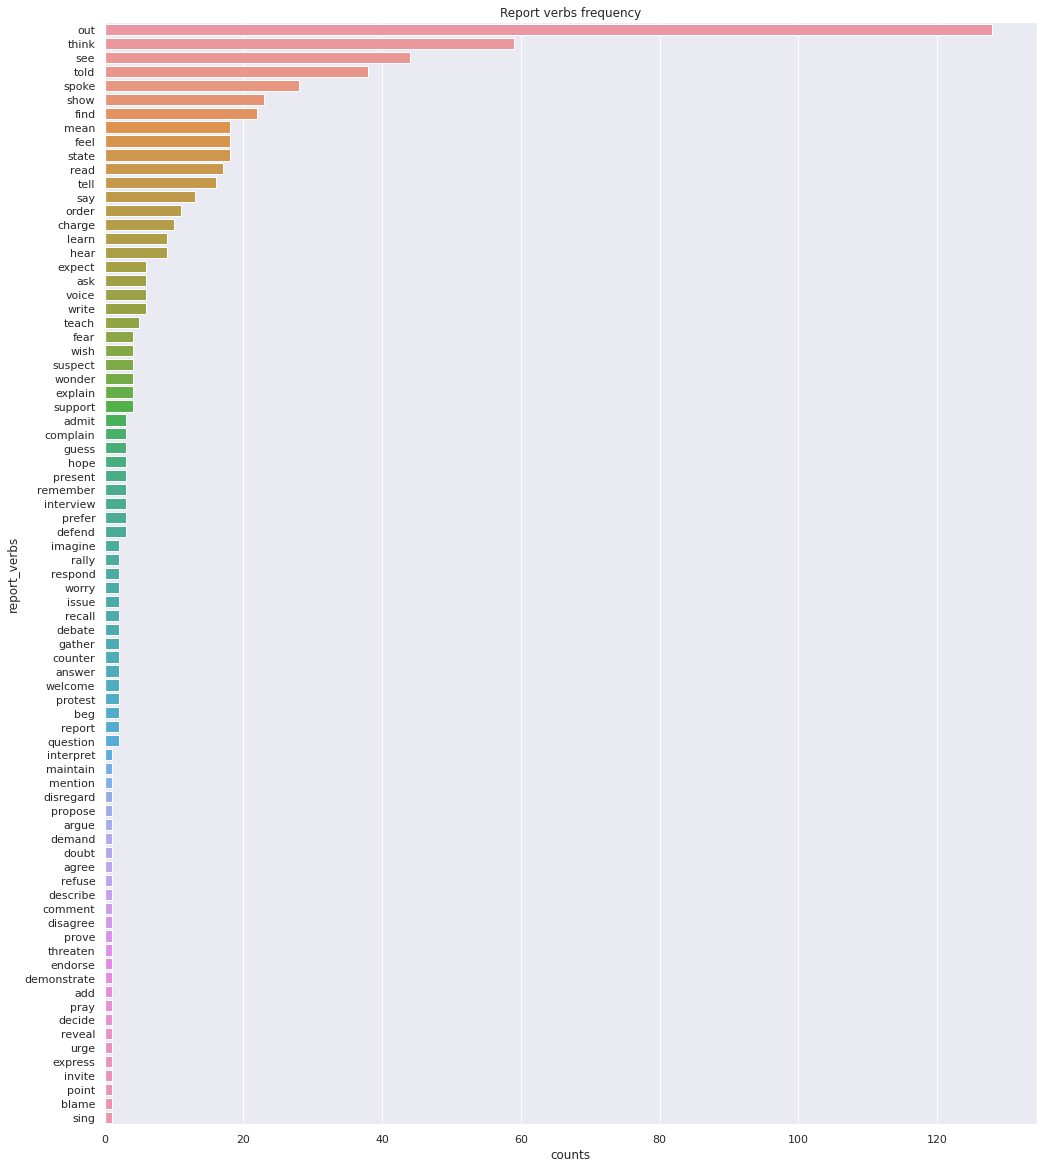

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','report_verbs','Report verbs frequency')

#### bias_word_list_01_2018

In [ ]:
lexicon = set(tokenize(lexicons['bias_word_list_01_2018.txt']))

In [ ]:
lexicon_features['bias_word_list_01_2018'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['bias_word_list_01_2018']!= 0,'bias_type']).value_counts())

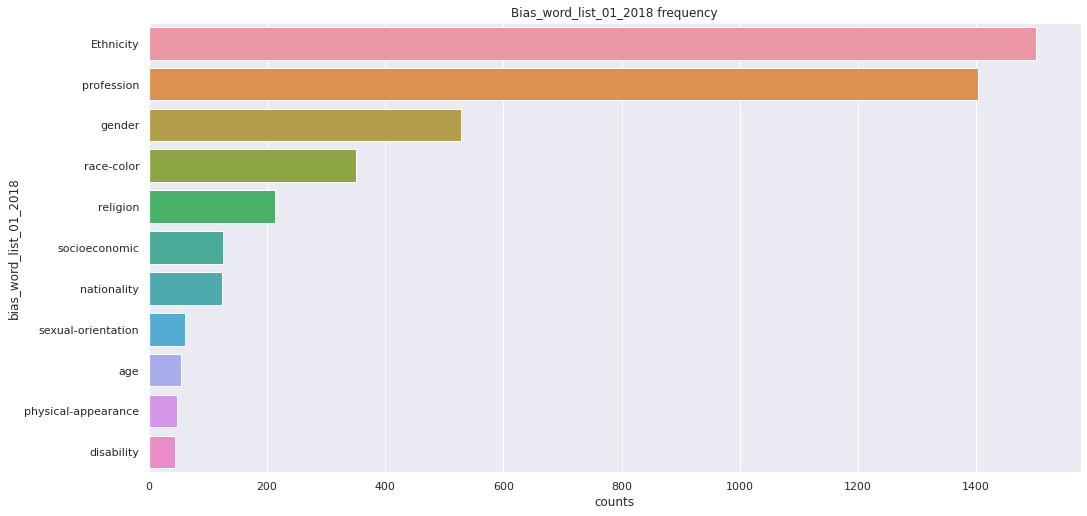

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','bias_word_list_01_2018','Bias_word_list_01_2018 frequency')

#### subjectivityClues_lexicon

In [ ]:
lexicon = set(tokenize(lexicons['subjectivityClues_lexicon.txt']))

In [ ]:
lexicon_features['subjectivityClues_lexicon'] = lexicon_features['tokenize'].apply(check_lexicon)

In [ ]:
counts = dict((lexicon_features.loc[lexicon_features['subjectivityClues_lexicon']!= 0,'bias_type']).value_counts())

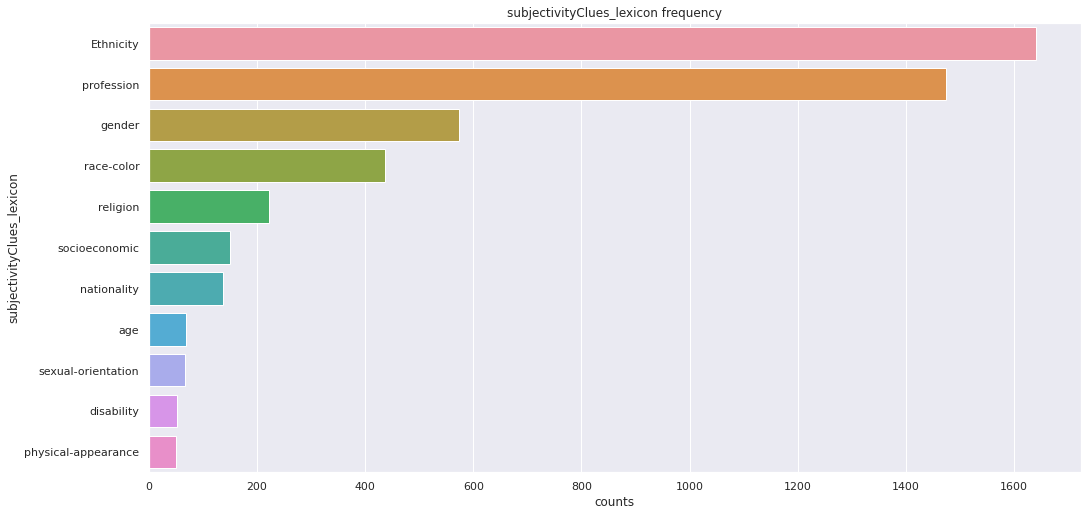

In [ ]:
snsbarplot(list(counts.values()),list(counts.keys()),'counts','subjectivityClues_lexicon','subjectivityClues_lexicon frequency')

### TBD:
* Add bias type count per lexicon analysis

# TBD

* Rerun with new categorization 
* Define Implicit and explicit stereotypes with reference
* Define each category by analyzing the stats
  * Keywords
  * Word clouds 
  etc.
* Toxicity detection using detoxify
* Summary for each analysis 
* Bi-variate analysis 
  * Explore more variable/features to extract and analyze
